In [4]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


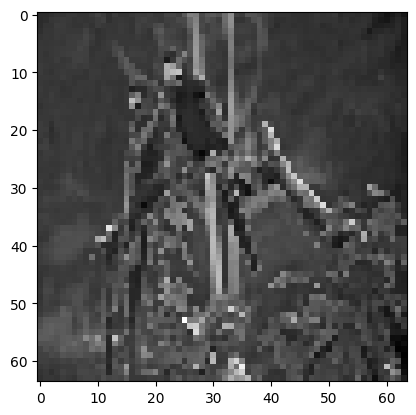

In [8]:
import matplotlib.image as mpimg
import torch
from einops import rearrange
import matplotlib.pyplot as plt
import cv2

example = mpimg.imread("../images/example.png")
example = example[:,:,:3]

example = cv2.resize(example, (64, 64))
example = cv2.cvtColor(example, cv2.COLOR_RGB2GRAY)


plt.imshow(example, cmap="gray")

torch.Size([256, 4, 4])


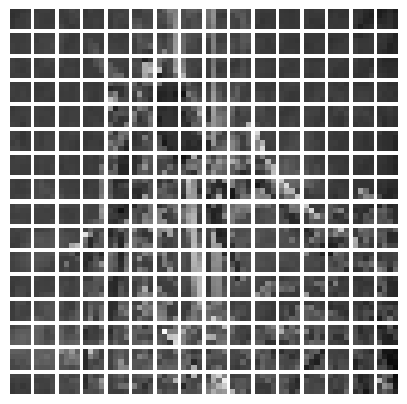

In [9]:
# rearrange to patches of 4x4
example = torch.from_numpy(example)
patches = rearrange(example, '(n_h p1) (n_w p2)-> (n_h n_w) p1 p2', p1=4, p2=4)

print(patches.shape) # number of patches, patch size_h, patch size_w, 3

fig = plt.figure(figsize=(5,5))
for i in range(16):
    for j in range(16):
        ax = plt.subplot(16, 16, i*16 + j + 1)
        patche = patches[i*16 + j]
        ax.imshow(patche, cmap="gray", vmin=0, vmax=1)
        ax.axis('off')

plt.show()
